## Boston Houses Dataset
- Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
X = boston.data
Y = boston.target
print(X.shape,Y.shape)

(506, 13) (506,)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(X)
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
#Normalise this dataset
# Each feature must have mean 0, unit variance
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
print(u.shape,std.shape)

(13,) (13,)


In [10]:
#Normalise the Data
X = (X-u)/std

In [11]:
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


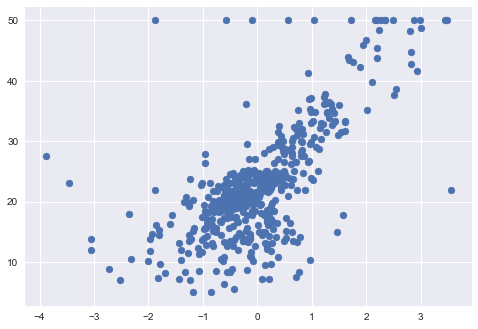

In [14]:
#Plot Y vs any feature
plt.style.use("seaborn")
plt.scatter(X[:,5],Y)
plt.show()

### Section - 2 Linear Regression on Multiple Features
- Boston Housing Dataset

In [15]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [22]:
#X - Matrix (m x n)
# x - Vector (Single Example)

def hypothesis(x,theta):
    y_pred = 0.0
    n = x.shape[0]
    for i in range(n):
        y_pred +=(theta[i]*x[i])
    return y_pred

def error(X,Y,theta):
    n = X.shape[0]
    total_error=0.0
    for i in range(n):
        y_pred = hypothesis(X[i],theta)
        total_error += (y_pred-Y[i])**2
    return total_error/n
        
def gradient(X,Y,theta):
    n = X.shape[0]
    grad = np.zeros((X.shape[1],))
    for j in range(X.shape[1]):
        
        for i in range(n):
            y_pred = hypothesis(X[i],theta)
            grad[j] += (y_pred - Y[i])*X[i][j] 
            
    return grad/n

def gradientDescent(X,Y,learning_rate=0.1,max_itr=500):
    theta = np.zeros((X.shape[1],))
    error_list = []
    
    for i in range(max_itr):
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        for j in range(X.shape[1]):
            theta[j] = theta[j] - learning_rate*grad[j]
    return theta,error_list

In [23]:
theta,error_list = gradientDescent(X,Y)
print(theta)

[ 2.25328063e+01 -9.21661049e-01  1.07018508e+00  1.05792229e-01
  6.86754753e-01 -2.05015324e+00  2.68068988e+00  1.39987663e-02
 -3.10628221e+00  2.57363827e+00 -1.97626899e+00 -2.05723354e+00
  8.48669383e-01 -3.74020167e+00]


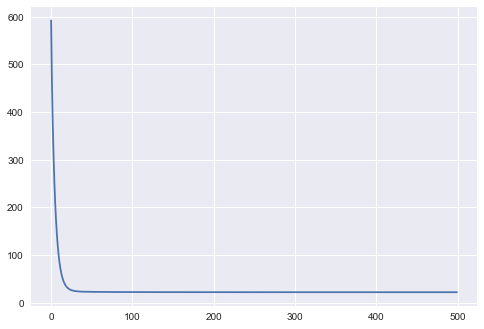

In [24]:
plt.plot(error_list)
plt.show()

## Predictions 

In [26]:
y_pred = []
for i in range(X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_pred.append(pred)
print(y_pred)

[30.05498214926882, 25.015677872045533, 30.565777007378497, 28.608480602596714, 27.94586679987069, 25.251084718063012, 22.99105483057305, 19.523817740795195, 11.510883063205933, 18.90694769272278, 18.98985448228953, 21.572553660301182, 20.901731302424523, 19.56416711091307, 19.293024488551655, 19.30904929505788, 20.544765609735023, 16.922913348235106, 16.193093122502844, 18.416391063982843, 12.532273947751317, 17.680731652252806, 15.846363153240251, 13.815388225358422, 15.687388624827939, 13.39508566417372, 15.471783745677847, 14.72083304923066, 19.55993963246577, 20.892082237859317, 11.46593989152143, 18.067743594996912, 8.830157343252846, 14.29175359095659, 13.72107826295698, 23.805446015238882, 22.334187306057245, 23.103113924925616, 22.91333298787422, 31.336379318167044, 34.1978514376658, 28.010180579581238, 25.187722191159466, 24.594777899334773, 22.919675795554245, 22.073490576236242, 20.40295164940804, 18.01006329735488, 9.077919669196927, 17.178513331470224, 21.24807469822231, 

In [27]:
def r2_score(y_pred,y):
    num = np.sum((y-y_pred)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100

In [28]:
r2_score(y_pred,Y)

74.06279773949944

### Section 3. Optimising Code using Vectorisation
An Efficient Implementation for Linear Regression using Vectorization
 - Avoid loops in the implementation except gradient descent main loop
 - Use numpy functions like np.sum(), np.dot() which are quite fast and already optimised

In [30]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,Y,theta):
    e = 0.0
    m = X.shape[0]
    y_pred = hypothesis(X,theta)
    e = np.sum((y_pred-Y)**2)
    return e/m

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((X.shape[1],))

    y_pred = hypothesis(X,theta)
    grad = np.dot(X.T,(y_pred-Y))
    
    return grad/m

def gradientDescent(X,Y,learning_rate=0.1,max_itr=500):
    theta = np.zeros((X.shape[1],))
    error_list = []
    
    for i in range(max_itr):
        
        e = error(X,Y,theta)
        error_list.append(e)
        
        grad = gradient(X,Y,theta)
        
        theta = theta - learning_rate*grad
    return theta,error_list

In [31]:
theta,error_list = gradientDescent(X,Y)
print(theta)

[ 2.25328063e+01 -9.21661049e-01  1.07018508e+00  1.05792229e-01
  6.86754753e-01 -2.05015324e+00  2.68068988e+00  1.39987663e-02
 -3.10628221e+00  2.57363827e+00 -1.97626899e+00 -2.05723354e+00
  8.48669383e-01 -3.74020167e+00]


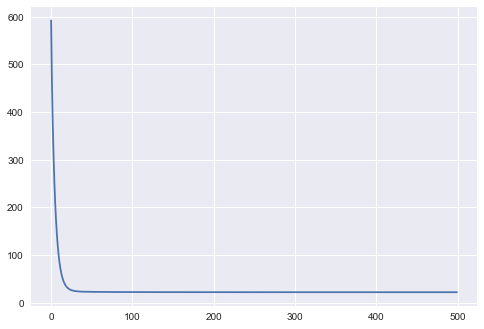

In [32]:
plt.plot(error_list)